**NOTE:** We will primarily be using Seaborn to plot our charts and later we will see how to customize our charts with Matplotlib.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default seaborn theme
sns.set_theme(style='darkgrid')

# Visualizing Statistical Relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables.

Relational charts are used for displaying multivariate data. These  charts show how one or more variables relates to other variables.
- **Questions:**
1. Is the relationship positive, negative, or neither?
2. How are x and y related to each other?
3. What makes one group or cluster different from another?

- **Insight:** use to show outliers, correlations, positive, and negative rela-tionships among two or more variables.
- **Data:** two or more numeric variables.
- **Chart options:** scatterplot, scatterplot matrix, bubble, parallel coordi-nates, radar, bullet, and a heat map.


### **Scatter Charts** (scatterplot, scatterplot matrix, bubble chart)

1. **Scatterplot:** Usually scatterplots are used to show relationships between two variables (x, y) using a cloud of points, where each point represents an observation in the dataset. This allows us to infer if there are any meaningful relationship between the variables, at a glance.
    - Use to show positive or negative correlations, or linear and nonlinear relationships between  variables.
    - Labeling of every data point reduces readability but increases interpretation.

2. **Scatterplot matrix:** Scatterplot matrices help identify a correlation between multiple variables. It makes it easy to observe the relationship between pairs of variables in one set of plots.

3. **Bubble chart:** A bubble chart is a scatterplot that shows relationships between three or four variables. 
The position of the bubble shows the relationship between the x and y variables.
    - The bubble size is based upon a numerical variable, such as population, or sales.
    - The bubble color is best reserved for categorical data, such as region.
    - Bubble charts are best when the bubble sizes vary significantly.



- `When to use:`
1. To show patterns in large sets of data, linear or non-linear trends, correlations, clusters, or outliers.
2. To compare large number of data points *without regard to time*.
3. To present relationships, but not exact values for comparisons.
4. If the order of points in the dataset is not essential.

- `Tips:` 
1. If applicable turn the horizontal axis into a logarithmic scale, thus showing the relationships between more widely distributed elements.

- `When to avoid:`
1. If you have a small dataset.
2. If the values in your dataset are not correlated.

- To draw a scatter-plot in seaborn, we will use the `seaborn.relplot(data, x, y, kind='scatter')` function. 
    
    - The detailed documentation of the functionality can be found at, https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot.

    - In Seaborn these two-dimensional graphics (i.e, the scatter plots) can be enhanced by mapping up to `three additional variables` using the semantics of,
        - `hue:` vector or key in data. Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
        - `size:` vector or key in data. Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.
        - `style:` vector or key in data. Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

    - Some other important function arguments are, 
        - `row`, `col:` vectors or keys in data. Variables that define subsets to plot on different facets.
        - `col_wrap:` int. “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.
        - `palette:` string, list, dict, or matplotlib.colors.Colormap. Method for choosing the colors to use when mapping the hue semantic.



In [3]:
# Loading in an example dataset
resturant_tips = sns.load_dataset('tips')
resturant_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
22,15.77,2.23,Female,No,Sat,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
77,27.20,4.00,Male,No,Thur,Lunch,4
138,16.00,2.00,Male,Yes,Thur,Lunch,2
27,12.69,2.00,Male,No,Sat,Dinner,2


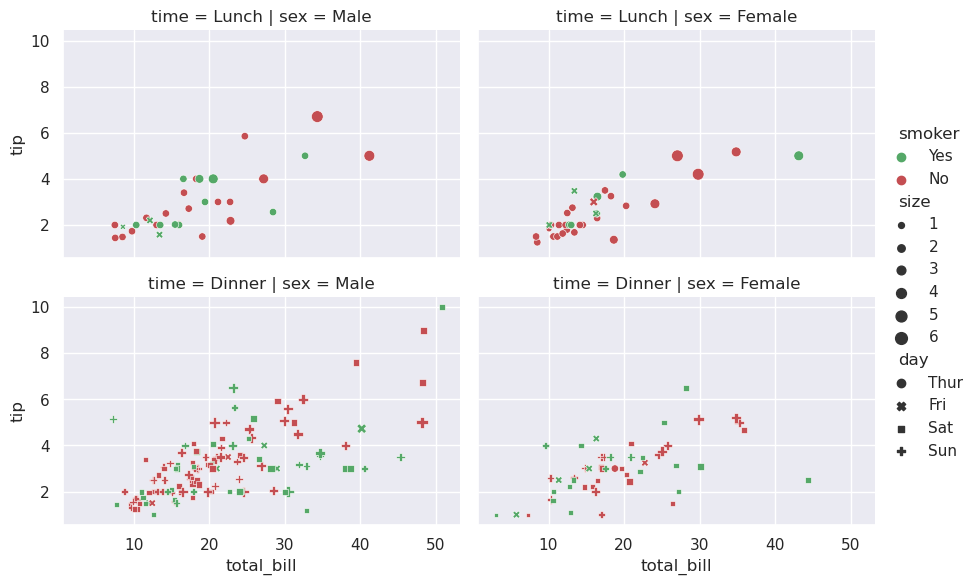

In [4]:
# exapmle of scatter plot
fig = sns.relplot(resturant_tips, kind="scatter", x='total_bill', y='tip', hue='smoker', style='day', size='size', row='time', col='sex', palette=['g', 'r'], height=3, aspect=1.5)

### **Heatmap**

A **heat map** is a graphical representation of a **table** of data. The individual values are arranged in a table matrix and represented by colors.
To represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. 

Heatmaps in Seaborn can be plotted by using the `seaborn.heatmap()` function. See the documentation @https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

- **Important Parameters:**

    - `data:` 2D dataset that can be coerced into an ndarray.
    - `vmin, vmax:` Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
    - `cmap:` The mapping from data values to color space. See the documentation @https://seaborn.pydata.org/tutorial/color_palettes.html .
    - `center:` The value at which to center the colormap when plotting divergent data.
    - `cbar:` Whether to draw a colorbar.
    - `annot:` If True, write the data value in each cell.
    - `fmt:` String formatting code to use when adding annotations.
    - `linewidths:` Width of the lines that will divide each cell.
    - `linecolor:` Color of the lines that will divide each cell.
    

In [5]:
# loading example dataset
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
mpg_1 = mpg.pivot_table(index='model_year', values=['cylinders', 'horsepower', 'weight', 'acceleration'], aggfunc='median').assign(weight = lambda df_: df_.weight/1000).rename({'weight': 'weight (ton)'}, axis='columns')
mpg_1.head()

,acceleration,cylinders,horsepower,weight (ton)
model_year,,,,
70,12.5,8.0,150.0,3.4490
71,14.5,6.0,95.0,2.7980
72,14.5,4.0,104.5,2.9560
73,14.0,7.0,129.5,3.3385
74,16.0,4.0,88.0,2.4890


- **plotting a heatmap**

<AxesSubplot: ylabel='model_year'>

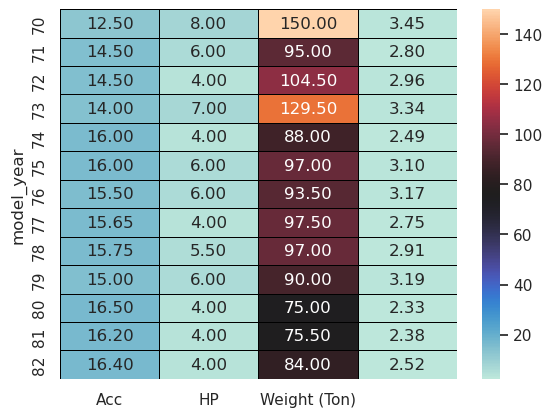

In [28]:
ytick = mpg_1.index
xtick = ["Acc", "HP", "Weight (Ton)"]
sns.heatmap(mpg_1, annot=True, fmt='.2f', cmap='icefire', xticklabels=xtick, yticklabels=ytick, linewidths=.5, linecolor='Black')

- **plotting a correlation heatmap**

In [13]:
mpg_corr = mpg_1.corr()

<AxesSubplot: >

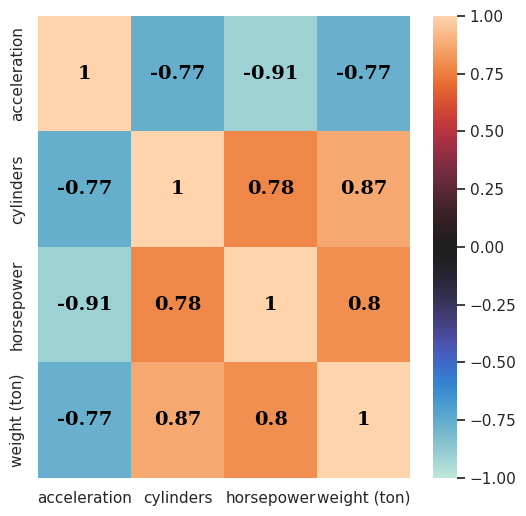

In [19]:
plt.figure(figsize=(6, 6))
sns.heatmap(mpg_corr, vmin=-1, vmax=1, center=0, annot=True, annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black', 'fontfamily':'serif'})